In [11]:
import os
import sys
import simpful as fs  # changed line 149 to show(block=False) (in simpful.py)
from matplotlib import pylab as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

old_stdout = sys.stdout

#sys.stdout = open(os.devnull, "w")
FS = fs.FuzzySystem()
sys.stdout = old_stdout
FS = fs.FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.5.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



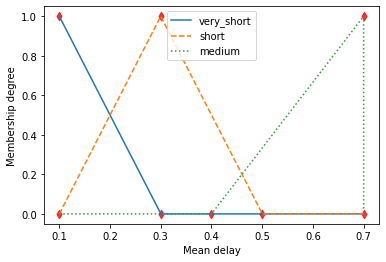

In [3]:
# Linguistic variables
# TODO Refactor, smarter way to add sets?
# Mean delay [m]
mean_delay_m1 = fs.FuzzySet(points=[[0.1, 1.],  [0.3, 0.]], term="very_short")
mean_delay_m2 = fs.FuzzySet(points=[[0.1, 0.],  [0.3, 1.], [0.5, 0.]], term="short")
mean_delay_m3 = fs.FuzzySet(points=[[0.4, 0.],  [0.7, 1], [0.7, 0.]], term="medium")
mean_delay = fs.LinguisticVariable([mean_delay_m1, mean_delay_m2, mean_delay_m3], concept="Mean delay")
# Add the linguistic variable to the system
FS.add_linguistic_variable("mean_delay", mean_delay)

# Plot the variable
FS.plot_variable("mean_delay")

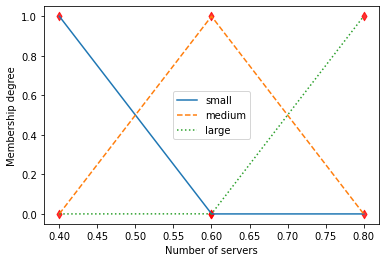

In [4]:
# Number of servers [s]
# TODO check numbers
num_of_servers_s1 = fs.FuzzySet(points=[[0.4, 1.], [0.6, 0.]], term="small")
num_of_servers_s2 = fs.FuzzySet(points=[[0.4, 0.], [0.6, 1.], [0.8, 0]], term="medium")
num_of_servers_s3 = fs.FuzzySet(points=[[0.6, 0.], [0.8, 1.]], term="large")
num_of_servers = fs.LinguisticVariable([num_of_servers_s1, num_of_servers_s2, num_of_servers_s3],
                                       concept="Number of servers")
# Add the linguistic variable to the system
FS.add_linguistic_variable("num_of_servers", num_of_servers)
# Plot the variable
FS.plot_variable("num_of_servers")


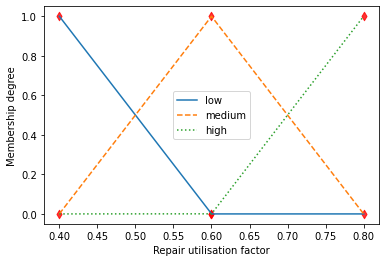

In [5]:
# Repair utilisation factor [rho]
# TODO check numbers
repair_util_rho1 = fs.FuzzySet(points=[[0.4, 1.], [0.6, 0.]], term="low")
repair_util_rho2 = fs.FuzzySet(points=[[0.4, 0.], [0.6, 1.], [0.8, 0]], term="medium")
repair_util_rho3 = fs.FuzzySet(points=[[0.6, 0.], [0.8, 1.]], term="high")
repair_util = fs.LinguisticVariable([repair_util_rho1, repair_util_rho2, repair_util_rho3],
                                    concept="Repair utilisation factor")
# Add the linguistic variable to the system
FS.add_linguistic_variable("repair_util", repair_util)
# Plot the variable
FS.plot_variable("repair_util")

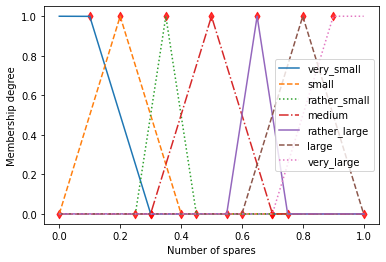

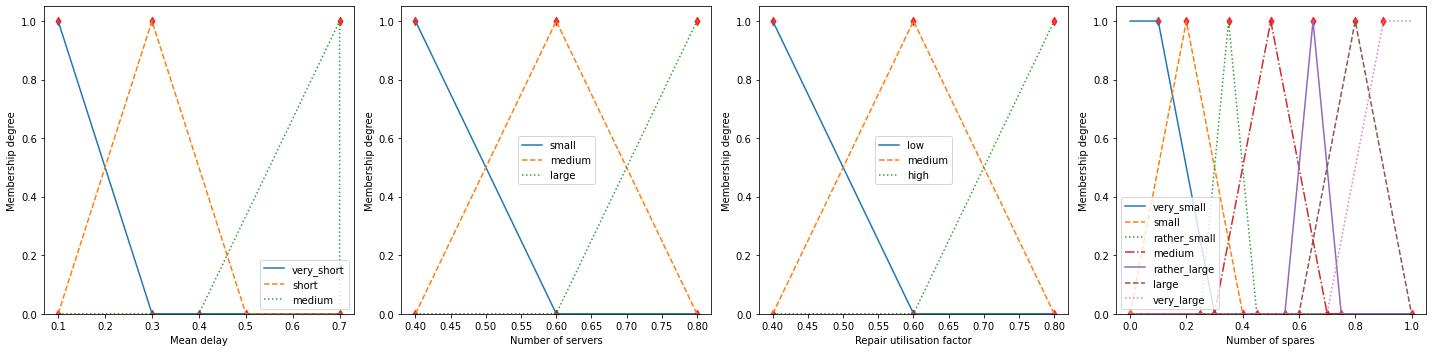

In [6]:
# Number of spares [n]
# TODO check numbers
num_of_spares_n1 = fs.FuzzySet(points=[[0.1, 1.], [0.3, 0.]], term="very_small")
num_of_spares_n2 = fs.FuzzySet(points=[[0., 0.], [0.2, 1.], [0.4, 0.]], term="small")
num_of_spares_n3 = fs.FuzzySet(points=[[0.25, 0.], [0.35, 1.], [0.45, 0.]], term="rather_small")
num_of_spares_n4 = fs.FuzzySet(points=[[0.3, 0.], [0.5, 1.], [0.7, 0.]], term="medium")
num_of_spares_n5 = fs.FuzzySet(points=[[0.55, 0.], [0.65, 1.], [0.75, 0.]], term="rather_large")
num_of_spares_n6 = fs.FuzzySet(points=[[0.6, 0.], [0.8, 1.], [1., 0.]], term="large")
num_of_spares_n7 = fs.FuzzySet(points=[[0.7, 0.], [0.9, 1.]], term="very_large")
num_of_spares = fs.LinguisticVariable([num_of_spares_n1, num_of_spares_n2, num_of_spares_n3, num_of_spares_n4,
                                       num_of_spares_n5, num_of_spares_n6, num_of_spares_n7],
                                      concept="Number of spares")
# Add the linguistic variable to the system
FS.add_linguistic_variable("num_of_spares", num_of_spares)
# Plot the variable
FS.plot_variable("num_of_spares")
FS.produce_figure()

In [7]:
# TODO check variable names and format
R1 = "IF (repair_util IS low) THEN (num_of_spares IS small)"
R2 = "IF (repair_util IS medium) THEN (num_of_spares IS medium)"
R3 = "IF (repair_util IS high) THEN (num_of_spares IS large)"
R4 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) THEN (num_of_spares IS very_large)"
R5 = "IF (mean_delay IS short) AND (num_of_servers IS small) THEN (num_of_spares IS large)"
R6 = "IF (mean_delay IS medium) AND (num_of_servers IS small) THEN (num_of_spares IS medium)"
R7 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) THEN (num_of_spares IS rather_large)"
R8 = "IF (mean_delay IS short) AND (num_of_servers IS medium) THEN (num_of_spares IS rather_small)"
R9 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) THEN (num_of_spares IS small)"
R10 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) THEN (num_of_spares IS medium)"
R11 = "IF (mean_delay IS short) AND (num_of_servers IS large) THEN (num_of_spares IS small)"
R12 = "IF (mean_delay IS medium) AND (num_of_servers IS large) THEN (num_of_spares IS very_small)"

# Add the rules to the system
FS.add_rules([R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12])

In [8]:
# Define the rules for db2
# mean_delay: very_short, short, medium
# number_of_servers: small, medium, large
# utilisation_factor: low, medium, high
# number_of_spares: very_small, small, rather_small, medium, rather_large, large, very_large
#Rule Base 2
R1_db2 = "IF (mean_delay IS very_short) and (number_of_servers IS small) and (utilisation_factor IS low) " \
         "THEN (number_of_spares IS very_small)"
R2_db2 = "IF (mean_delay IS short) and (number_of_servers IS small) and (utilisation_factor IS low) " \
         "THEN (number_of_spares IS very_small)"
R3_db2 = "IF (mean_delay IS medium) and (number_of_servers IS small) and (utilisation_factor IS low) " \
         "THEN (number_of_spares IS very_small)"
R4_db2 = "IF (mean_delay IS very_short) and (number_of_servers IS medium) and (utilisation_factor IS low) " \
         "THEN (number_of_spares IS very_small)"
R5_db2 = "IF (mean_delay IS short) and (number_of_servers IS medium) and (utilisation_factor IS low) " \
         "THEN (number_of_spares IS very_small)"
R6_db2 = "IF (mean_delay IS medium) and (number_of_servers IS medium) and (utilisation_factor IS low) " \
         "THEN (number_of_spares IS very_small)"
R7_db2 = "IF (mean_delay IS very_short) and (number_of_servers IS large) and (utilisation_factor IS low) " \
         "THEN (number_of_spares IS small)"
R8_db2 = "IF (mean_delay IS short) and (number_of_servers IS large) and (utilisation_factor IS low) " \
         "THEN (number_of_spares IS small)"
R9_db2 = "IF (mean_delay IS medium) and (number_of_servers IS large) and (utilisation_factor IS low) " \
         "THEN (number_of_spares IS very_small)"
R10_db2 = "IF (mean_delay IS very_short) and (number_of_servers IS small) and (utilisation_factor IS medium) " \
          "THEN (number_of_spares IS small)"
R11_db2 = "IF (mean_delay IS short) and (number_of_servers IS small) and (utilisation_factor IS medium) " \
          "THEN (number_of_spares IS very_small)"
R12_db2 = "IF (mean_delay IS medium) and (number_of_servers IS small) and (utilisation_factor IS medium) " \
          "THEN (number_of_spares IS very_small)"
R13_db2 = "IF (mean_delay IS very_short) and (number_of_servers IS medium) and (utilisation_factor IS medium) " \
          "THEN (number_of_spares IS rather_small)"
R14_db2 = "IF (mean_delay IS short) and (number_of_servers IS medium) and (utilisation_factor IS medium) " \
          "THEN (number_of_spares IS small)"
R15_db2 = "IF (mean_delay IS medium) and (number_of_servers IS medium) and (utilisation_factor IS medium) " \
          "THEN (number_of_spares IS very_small)"
R16_db2 = "IF (mean_delay IS very_short) and (number_of_servers IS large) and (utilisation_factor IS medium) " \
          "THEN (number_of_spares IS medium)"
R17_db2 = "IF (mean_delay IS short) and (number_of_servers IS large) and (utilisation_factor IS medium) " \
          "THEN (number_of_spares IS rather_small)"
R18_db2 = "IF (mean_delay IS medium) and (number_of_servers IS large) and (utilisation_factor IS medium) " \
          "THEN (number_of_spares IS small)"
R19_db2 = "IF (mean_delay IS very_short) and (number_of_servers IS small) and (utilisation_factor IS high) " \
          "THEN (number_of_spares IS very_large)"
R20_db2 = "IF (mean_delay IS short) and (number_of_servers IS small) and (utilisation_factor IS high) " \
          "THEN (number_of_spares IS large)"
R21_db2 = "IF (mean_delay IS medium) and (number_of_servers IS small) and (utilisation_factor IS high) " \
          "THEN (number_of_spares IS medium)"
R22_db2 = "IF (mean_delay IS very_short) and (number_of_servers IS medium) and (utilisation_factor IS high) " \
          "THEN (number_of_spares IS medium)"
R23_db2 = "IF (mean_delay IS short) and (number_of_servers IS medium) and (utilisation_factor IS high) " \
          "THEN (number_of_spares IS medium)"
R24_db2 = "IF (mean_delay IS medium) and (number_of_servers IS medium) and (utilisation_factor IS high) " \
          "THEN (number_of_spares IS small)"
R25_db2 = "IF (mean_delay IS very_short) and (number_of_servers IS large) and (utilisation_factor IS high) " \
          "THEN (number_of_spares IS rather_large)"
R26_db2 = "IF (mean_delay IS short) and (number_of_servers IS large) and (utilisation_factor IS high) " \
          "THEN (number_of_spares IS medium)"
R27_db2 = "IF (mean_delay IS medium) and (number_of_servers IS large) and (utilisation_factor IS high) " \
          "THEN (number_of_spares IS rather_small)"

rule_base2 = [R1_db2, R2_db2, R3_db2, R4_db2, R5_db2, R6_db2, R7_db2, R8_db2, R9_db2, R10_db2, R11_db2, R12_db2,
              R13_db2, R14_db2, R15_db2, R16_db2, R17_db2, R18_db2, R19_db2, R20_db2, R21_db2, R22_db2, R23_db2,
              R24_db2, R25_db2, R26_db2, R27_db2]